# This project deals with several datasets. This project deals with data preprocessing, data imputation by handling the missing data, using KNN classifier and also uses differnt methods to calculate nodes distances and shows the differnce between the accuracy of predicted models using different methods.

## tool used for data preprocessing and handling: pandas

## tool used for visualization : matplotlib

## model used for prediction: KNN Classifer with grid search and also used different techniques to measure the distance between nodes

## tools used for data validation: cross validation accuracy using cross_val_score

In [ ]:
# Mounting Data on Google Drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [282]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 abalone.data                homework01.ipynb       'Practise 2.ipynb'
 breast-cancer.data          homework02.ipynb        SPECT.test
 car.data                    homework03.ipynb        SPECT.train
 car.dot                     homework05.ipynb        transfusion.data
 car_model.dot               iris_tree.dot           tree.dot
 car.png                     iris_tree.png           tree.png
'Copy of homework05.ipynb'  'ML Challenge 1.ipynb'   weather.csv
 ecoli.data                 'Practise 1.ipynb'       weather.ipynb


In [ ]:
# Loading Data

In [4]:
import pandas as pd

In [283]:
blood_df = pd.read_csv('transfusion.data')
blood_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [6]:
cancer_df = pd.read_csv('breast-cancer.data',header=None)
cancer_df.columns = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','Label']
cancer_df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [7]:
ecoli_df = pd.read_csv('ecoli.data',header=None,delim_whitespace=True)
ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']
ecoli_df

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [8]:
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)

In [9]:
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
# Data analysis

# **Observation on data analysis of blood dataset**

The blood dataset has 748 rows and 5 columns. All the data type are integer values, as all the values are numeric type it doesn't seem that the values need any kind of Label enconding. The values can be re scaled a bit but that is optional.


In [10]:
blood_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [11]:
blood_df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [12]:
blood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [13]:
blood_df['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [14]:
blood_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# **Observation on data analysis of cancer dataset**

The cancer dataset has 286 rows and 10 columns. All the data type are categorical values except one column which is integer, as most of the values are catergorical , implementing one-hot encoding will be a good solution. 

In [15]:
cancer_df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [16]:
cancer_df.tail()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [17]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   Label        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [18]:
cancer_df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


# **Observation on data analysis of ecoli dataset**

The ecoli dataset has 336 rows and 8 columns. All the data type are numerical values except the Label column which is textual, as most of the values are numerical only one column is textual , implementing Label encoder will be a good solution. 

In [19]:
ecoli_df_updated.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [20]:
ecoli_df_updated.tail()

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp
335,0.74,0.74,0.48,0.5,0.31,0.53,0.52,pp


In [21]:
ecoli_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   Label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [22]:
ecoli_df_updated.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [ ]:
# Feature preprocessing.

In [ ]:
# Data imputation, Handling missing data

In [23]:
blood_df[(blood_df.isna().any(axis=1))]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007


In [24]:
cancer_df_cleaned = cancer_df[-((cancer_df=='?').any(axis=1))]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
cancer_df_cleaned

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [26]:
ecoli_df[(ecoli_df.isna().any(axis=1))]

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,Label


In [ ]:
# Convert textual/categorical column into numeric numbers 

In [28]:
cancer_features = cancer_df.drop('Label',axis=1)
cancer_label = cancer_df['Label']
cancer_features_encode=pd.get_dummies(cancer_features.astype('category'))
cancer_features_encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cancer_label=le.fit_transform(cancer_label)

In [29]:
cancer_features_encode

,class_no-recurrence-events,class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_?,node-caps_no,node-caps_yes,deg-malig_1,deg-malig_2,deg-malig_3,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
282,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0
283,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
284,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0


In [30]:
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [31]:
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)
ecoli_df_updated['Label'] = LabelEncoder().fit_transform(ecoli_df['Label'])

In [32]:
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [33]:
ecoli_df_updated_features = ecoli_df_updated.drop('Label',axis=1)
ecoli_df_updated_label = ecoli_df_updated['Label']

In [34]:
from sklearn.preprocessing import MinMaxScaler
blood_features = blood_df.drop('whether he/she donated blood in March 2007',axis=1)
blood_label = blood_df['whether he/she donated blood in March 2007']
#X_train_blood = blood_features
scaler = MinMaxScaler()
X_train_scale_blood=scaler.fit_transform(blood_features)
y_train_blood = blood_label

In [35]:
from sklearn import preprocessing
blood_features = preprocessing.scale(blood_features) 

In [ ]:
#  Design k-NN classifier using hyper-parameter tuning and model selection 

In [36]:
import scipy.spatial.distance as distance
# euclidean distance
distance.euclidean

# Minkowski distance
distance.minkowski

# cosine distance
distance.cosine

<function scipy.spatial.distance.cosine>

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np
def chi_square_distance(X, Y):
    with np.errstate(divide="ignore", invalid="ignore"):
        return (1 / 2) * np.sum(np.nan_to_num((np.square(X - Y) / (X + Y))))

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()

## we are using repeated cross-validation here. This means the cross-validation will be repeatedly run multiple times to get more robust error estimation. The key changes are highlighted
from sklearn.model_selection import RepeatedKFold
skfold = RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)



In [38]:
blood_grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)
blood_grid_search.fit(X_train_scale_blood,y_train_blood)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=5,
             param_grid={'metric': [<function chi_square_distance at 0x7fb45f77bc80>,
                                    <function euclidean at 0x7fb46626a1e0>,
                                    <function minkowski at 0x7fb46626a0d0>,
                                    <function cosine at 0x7fb46626a378>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [39]:
cancer_grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)
cancer_grid_search.fit(cancer_features_encode,cancer_label)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=5,
             param_grid={'metric': [<function chi_square_distance at 0x7fb45f77bc80>,
                                    <function euclidean at 0x7fb46626a1e0>,
                                    <function minkowski at 0x7fb46626a0d0>,
                                    <function cosine at 0x7fb46626a378>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [40]:
ecoli_grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)
ecoli_grid_search.fit(ecoli_df_updated_features,ecoli_df_updated_label)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=5,
             param_grid={'metric': [<function chi_square_distance at 0x7fb45f77bc80>,
                                    <function euclidean at 0x7fb46626a1e0>,
                                    <function minkowski at 0x7fb46626a0d0>,
                                    <function cosine at 0x7fb46626a378>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [ ]:
#  Analysis Results from Cross-validation

In [ ]:
 # Get a detailed report from GridSearch cross-validation.

In [95]:
blood_df_cv = pd.DataFrame(blood_grid_search.cv_results_)
blood_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,...,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.696954,0.039042,4.183230,0.299050,<function chi_square_distance at 0x7fb45f77bc80>,1,{'metric': <function chi_square_distance at 0x...,0.653333,0.706667,0.613333,0.613333,0.680000,0.653333,0.720000,0.733333,0.635135,0.608108,0.546667,0.626667,0.680000,0.640000,0.693333,0.666667,0.573333,0.680000,0.743243,0.662162,0.666667,0.693333,0.600000,0.733333,0.626667,0.653333,0.706667,0.626667,0.621622,0.689189,0.666667,0.680000,0.666667,...,0.680000,0.733333,0.640000,0.693333,0.680000,0.554054,0.783784,0.653333,0.733333,0.613333,0.720000,0.560000,0.613333,0.733333,0.600000,0.608108,0.716216,0.666667,0.613333,0.626667,0.693333,0.706667,0.640000,0.706667,0.720000,0.675676,0.648649,0.680000,0.626667,0.693333,0.546667,0.693333,0.693333,0.613333,0.586667,0.675676,0.675676,0.654814,0.053040,59
1,0.689052,0.036187,4.275097,0.301305,<function chi_square_distance at 0x7fb45f77bc80>,2,{'metric': <function chi_square_distance at 0x...,0.760000,0.720000,0.773333,0.733333,0.826667,0.706667,0.840000,0.733333,0.702703,0.716216,0.626667,0.733333,0.840000,0.786667,0.706667,0.720000,0.773333,0.746667,0.810811,0.716216,0.800000,0.786667,0.733333,0.760000,0.773333,0.800000,0.746667,0.746667,0.716216,0.810811,0.693333,0.786667,0.813333,...,0.760000,0.733333,0.813333,0.786667,0.760000,0.689189,0.851351,0.760000,0.786667,0.706667,0.773333,0.640000,0.693333,0.826667,0.760000,0.770270,0.837838,0.733333,0.680000,0.626667,0.733333,0.800000,0.786667,0.760000,0.786667,0.851351,0.756757,0.746667,0.746667,0.760000,0.706667,0.826667,0.813333,0.746667,0.773333,0.689189,0.729730,0.753629,0.050246,50
2,0.692539,0.037208,4.327838,0.296682,<function chi_square_distance at 0x7fb45f77bc80>,3,{'metric': <function chi_square_distance at 0x...,0.786667,0.773333,0.760000,0.733333,0.773333,0.693333,0.786667,0.786667,0.675676,0.689189,0.600000,0.773333,0.773333,0.760000,0.733333,0.826667,0.746667,0.760000,0.797297,0.702703,0.746667,0.786667,0.760000,0.746667,0.773333,0.826667,0.733333,0.706667,0.689189,0.810811,0.720000,0.746667,0.840000,...,0.746667,0.760000,0.746667,0.706667,0.720000,0.675676,0.824324,0.733333,0.773333,0.653333,0.760000,0.653333,0.706667,0.826667,0.773333,0.770270,0.810811,0.733333,0.706667,0.613333,0.733333,0.786667,0.746667,0.786667,0.813333,0.770270,0.756757,0.773333,0.720000,0.733333,0.733333,0.733333,0.826667,0.733333,0.733333,0.702703,0.716216,0.746645,0.048135,53
3,0.701690,0.034104,4.399094,0.315058,<function chi_square_distance at 0x7fb45f77bc80>,4,{'metric': <function chi_square_distance at 0x...,0.746667,0.

In [226]:
cancer_df_cv = pd.DataFrame(cancer_grid_search.cv_results_)
cancer_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,...,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.231745,0.019674,1.591572,0.070854,<function chi_square_distance at 0x7fb45f77bc80>,1,{'metric': <function chi_square_distance at 0x...,0.655172,0.689655,0.620690,0.689655,0.689655,0.724138,0.714286,0.571429,0.714286,0.857143,0.620690,0.655172,0.655172,0.724138,0.793103,0.758621,0.642857,0.642857,0.678571,0.785714,0.724138,0.689655,0.620690,0.793103,0.724138,0.724138,0.642857,0.642857,0.535714,0.785714,0.758621,0.586207,0.724138,...,0.862069,0.655172,0.655172,0.750000,0.750000,0.642857,0.678571,0.655172,0.793103,0.655172,0.827586,0.689655,0.793103,0.642857,0.678571,0.714286,0.464286,0.689655,0.689655,0.689655,0.758621,0.724138,0.586207,0.892857,0.678571,0.678571,0.750000,0.689655,0.724138,0.689655,0.724138,0.586207,0.689655,0.714286,0.642857,0.821429,0.607143,0.696453,0.080086,60
1,0.230134,0.020494,1.643849,0.061461,<function chi_square_distance at 0x7fb45f77bc80>,2,{'metric': <function chi_square_distance at 0x...,0.793103,0.689655,0.689655,0.758621,0.793103,0.655172,0.750000,0.642857,0.785714,0.892857,0.689655,0.724138,0.655172,0.862069,0.827586,0.793103,0.678571,0.714286,0.678571,0.785714,0.724138,0.724138,0.655172,0.827586,0.827586,0.655172,0.678571,0.857143,0.642857,0.785714,0.827586,0.724138,0.724138,...,0.862069,0.620690,0.689655,0.750000,0.750000,0.785714,0.750000,0.724138,0.862069,0.655172,0.896552,0.724138,0.896552,0.642857,0.678571,0.785714,0.571429,0.724138,0.793103,0.689655,0.827586,0.862069,0.586207,0.964286,0.678571,0.642857,0.750000,0.758621,0.758621,0.793103,0.758621,0.620690,0.724138,0.750000,0.714286,0.857143,0.714286,0.743202,0.081584,52
2,0.226908,0.020391,1.649904,0.070107,<function chi_square_distance at 0x7fb45f77bc80>,3,{'metric': <function chi_square_distance at 0x...,0.793103,0.724138,0.655172,0.793103,0.793103,0.724138,0.750000,0.642857,0.750000,0.857143,0.655172,0.793103,0.551724,0.793103,0.827586,0.758621,0.678571,0.678571,0.642857,0.785714,0.758621,0.689655,0.724138,0.793103,0.827586,0.655172,0.714286,0.821429,0.642857,0.785714,0.724138,0.724138,0.689655,...,0.793103,0.655172,0.689655,0.750000,0.678571,0.714286,0.714286,0.689655,0.827586,0.655172,0.862069,0.724138,0.827586,0.642857,0.714286,0.714286,0.714286,0.758621,0.758621,0.689655,0.689655,0.931034,0.551724,0.928571,0.642857,0.642857,0.821429,0.758621,0.689655,0.758621,0.758621,0.586207,0.689655,0.571429,0.642857,0.857143,0.750000,0.728202,0.077095,53
3,0.231873,0.021234,1.671290,0.071327,<function chi_square_distance at 0x7fb45f77bc80>,4,{'metric': <function chi_square_distance at 0x...,0.758621,0.

In [43]:
ecoli_df_cv = pd.DataFrame(ecoli_grid_search.cv_results_)
ecoli_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,...,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.260166,0.031018,1.631558,0.121200,<function chi_square_distance at 0x7fb45f77bc80>,1,{'metric': <function chi_square_distance at 0x...,0.823529,0.794118,0.794118,0.705882,0.911765,0.794118,0.606061,0.848485,0.878788,0.696970,0.794118,0.852941,0.852941,0.882353,0.852941,0.764706,0.757576,0.696970,0.787879,0.757576,0.852941,0.764706,0.794118,0.705882,0.882353,0.882353,0.696970,0.787879,0.787879,0.909091,0.794118,0.823529,0.705882,...,0.735294,0.735294,0.852941,0.818182,0.787879,0.848485,0.818182,0.823529,0.882353,0.794118,0.735294,0.852941,0.705882,0.818182,0.787879,0.757576,0.878788,0.764706,0.852941,0.705882,0.617647,0.852941,0.911765,0.878788,0.818182,0.939394,0.757576,0.676471,0.735294,0.852941,0.852941,0.852941,0.852941,0.939394,0.787879,0.696970,0.787879,0.805909,0.071441,58
1,0.258900,0.023687,1.679139,0.107721,<function chi_square_distance at 0x7fb45f77bc80>,2,{'metric': <function chi_square_distance at 0x...,0.852941,0.823529,0.764706,0.764706,0.852941,0.852941,0.636364,0.848485,0.939394,0.696970,0.823529,0.852941,0.823529,0.882353,0.823529,0.794118,0.757576,0.727273,0.848485,0.757576,0.911765,0.852941,0.764706,0.764706,0.911765,0.852941,0.666667,0.787879,0.757576,0.878788,0.794118,0.882353,0.735294,...,0.735294,0.823529,0.794118,0.909091,0.787879,0.787879,0.757576,0.823529,0.852941,0.794118,0.705882,0.882353,0.764706,0.878788,0.787879,0.757576,0.848485,0.794118,0.852941,0.735294,0.647059,0.764706,0.823529,0.818182,0.878788,0.939394,0.787879,0.764706,0.764706,0.852941,0.794118,0.852941,0.852941,0.939394,0.757576,0.696970,0.818182,0.810971,0.065037,57
2,0.256965,0.019776,1.713761,0.096776,<function chi_square_distance at 0x7fb45f77bc80>,3,{'metric': <function chi_square_distance at 0x...,0.852941,0.911765,0.852941,0.823529,0.911765,0.823529,0.727273,0.848485,0.939394,0.727273,0.882353,0.911765,0.852941,0.882353,0.852941,0.794118,0.787879,0.727273,0.878788,0.787879,0.882353,0.882353,0.794118,0.852941,0.852941,0.852941,0.757576,0.818182,0.848485,0.939394,0.794118,0.882353,0.764706,...,0.794118,0.911765,0.823529,0.939394,0.848485,0.727273,0.818182,0.823529,0.911765,0.735294,0.764706,0.882353,0.764706,0.848485,0.878788,0.878788,0.878788,0.823529,0.882353,0.735294,0.705882,0.794118,0.882353,0.878788,0.909091,0.969697,0.787879,0.882353,0.735294,0.852941,0.852941,0.911765,0.852941,0.909091,0.787879,0.787879,0.909091,0.841114,0.062999,49
3,0.256992,0.018865,1.736983,0.106803,<function chi_square_distance at 0x7fb45f77bc80>,4,{'metric': <function chi_square_distance at 0x...,0.852941,0.

In [182]:
blood_df_cv_updated = blood_df_cv[['param_n_neighbors','param_metric','mean_test_score']]

In [227]:
cancer_df_cv_updated = cancer_df_cv[['param_n_neighbors','param_metric','mean_test_score']]

In [184]:
ecoli_df_cv_updated = ecoli_df_cv[['param_n_neighbors','param_metric','mean_test_score']]

In [228]:
blood_df_cv_updated['param_metric'] = blood_df_cv_updated['param_metric'].astype(str)
cancer_df_cv_updated['param_metric'] = cancer_df_cv_updated['param_metric'].astype(str)
ecoli_df_cv_updated['param_metric'] = ecoli_df_cv_updated['param_metric'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [229]:
blood_df_cv_updated['Metric'] = blood_df_cv_updated.param_metric.str.extract(r'\s([^\s]*)\s',expand=False)
cancer_df_cv_updated['Metric'] = cancer_df_cv_updated.param_metric.str.extract(r'\s([^\s]*)\s',expand=False)
ecoli_df_cv_updated['Metric'] = ecoli_df_cv_updated.param_metric.str.extract(r'\s([^\s]*)\s',expand=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [187]:
blood_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.654814,chi_square_distance
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.753629,chi_square_distance
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.746645,chi_square_distance
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.770312,chi_square_distance
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.774728,chi_square_distance
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.780742,chi_square_distance
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.771245,chi_square_distance
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.780360,chi_square_distance
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.778344,chi_square_distance
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.782906,chi_square_distance


In [217]:
blood_df_cv_updated['chi_square']=blood_df_cv_updated.loc[blood_df_cv_updated['Metric'] == 'chi_square_distance', 'mean_test_score']
blood_df_cv_updated['euclidean']=blood_df_cv_updated.loc[blood_df_cv_updated['Metric'] == 'euclidean', 'mean_test_score']
blood_df_cv_updated['minkowski']=blood_df_cv_updated.loc[blood_df_cv_updated['Metric'] == 'minkowski', 'mean_test_score']
blood_df_cv_updated['cosine']=blood_df_cv_updated.loc[blood_df_cv_updated['Metric'] == 'cosine', 'mean_test_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [189]:
blood_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric,chi_square,euclidean,minkowski,cosine
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.654814,chi_square_distance,0.654814,NaN,NaN,NaN
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.753629,chi_square_distance,0.753629,NaN,NaN,NaN
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.746645,chi_square_distance,0.746645,NaN,NaN,NaN
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.770312,chi_square_distance,0.770312,NaN,NaN,NaN
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.774728,chi_square_distance,0.774728,NaN,NaN,NaN
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.780742,chi_square_distance,0.780742,NaN,NaN,NaN
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.771245,chi_square_distance,0.771245,NaN,NaN,NaN
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.780360,chi_square_distance,0.780360,NaN,NaN,NaN
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.778344,chi_square_distance,0.778344,NaN,NaN,NaN
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.782906,chi_square_distance,0.782906,NaN,NaN,NaN


In [288]:
blood_df_cv_updated_new = blood_df_cv_updated.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
drop_mul_row_blood = blood_df_cv_updated_new.drop(blood_df_cv_updated_new.index[15:60])
drop_param_metric_blood = drop_mul_row_blood.drop('param_metric',axis=1)
blood_df_final = drop_param_metric_blood.drop('Metric',axis=1)
blood_df_final

,param_n_neighbors,mean_test_score,chi_square,euclidean,minkowski,cosine
0,1,0.654814,0.654814,0.660695,0.660695,0.646827
1,2,0.753629,0.753629,0.756294,0.756294,0.750013
2,3,0.746645,0.746645,0.743978,0.743978,0.743834
3,4,0.770312,0.770312,0.76189,0.76189,0.763912
4,5,0.774728,0.774728,0.761903,0.761903,0.750915
5,6,0.780742,0.780742,0.773013,0.773013,0.770607
6,7,0.771245,0.771245,0.768872,0.768872,0.757746
7,8,0.780360,0.78036,0.774623,0.774623,0.769665
8,9,0.778344,0.778344,0.769935,0.769935,0.765375
9,10,0.782906,0.782906,0.776357,0.776357,0.772459


In [230]:
cancer_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.696453,chi_square_distance
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.743202,chi_square_distance
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.728202,chi_square_distance
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.748461,chi_square_distance
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.746293,chi_square_distance
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.754791,chi_square_distance
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.756145,chi_square_distance
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.756872,chi_square_distance
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.758264,chi_square_distance
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.765591,chi_square_distance


In [231]:
cancer_df_cv_updated['chi_square']=cancer_df_cv_updated.loc[cancer_df_cv_updated['Metric'] == 'chi_square_distance', 'mean_test_score']
cancer_df_cv_updated['euclidean']=cancer_df_cv_updated.loc[cancer_df_cv_updated['Metric'] == 'euclidean', 'mean_test_score']
cancer_df_cv_updated['minkowski']=cancer_df_cv_updated.loc[cancer_df_cv_updated['Metric'] == 'minkowski', 'mean_test_score']
cancer_df_cv_updated['cosine']=cancer_df_cv_updated.loc[cancer_df_cv_updated['Metric'] == 'cosine', 'mean_test_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [232]:
cancer_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric,chi_square,euclidean,minkowski,cosine
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.696453,chi_square_distance,0.696453,NaN,NaN,NaN
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.743202,chi_square_distance,0.743202,NaN,NaN,NaN
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.728202,chi_square_distance,0.728202,NaN,NaN,NaN
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.748461,chi_square_distance,0.748461,NaN,NaN,NaN
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.746293,chi_square_distance,0.746293,NaN,NaN,NaN
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.754791,chi_square_distance,0.754791,NaN,NaN,NaN
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.756145,chi_square_distance,0.756145,NaN,NaN,NaN
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.756872,chi_square_distance,0.756872,NaN,NaN,NaN
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.758264,chi_square_distance,0.758264,NaN,NaN,NaN
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.765591,chi_square_distance,0.765591,NaN,NaN,NaN


In [287]:
cancer_df_cv_updated_new = cancer_df_cv_updated.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
drop_mul_row_cancer = cancer_df_cv_updated_new.drop(cancer_df_cv_updated_new.index[15:60])
drop_param_metric_cancer = drop_mul_row_cancer.drop('param_metric',axis=1)
cancer_df_final = drop_param_metric_cancer.drop('Metric',axis=1)
cancer_df_final

,param_n_neighbors,mean_test_score,chi_square,euclidean,minkowski,cosine
0,1,0.696453,0.696453,0.697882,0.697882,0.698227
1,2,0.743202,0.743202,0.744594,0.744594,0.744594
2,3,0.728202,0.728202,0.725739,0.725739,0.725739
3,4,0.748461,0.748461,0.748842,0.748842,0.748842
4,5,0.746293,0.746293,0.748768,0.748768,0.748768
5,6,0.754791,0.754791,0.753017,0.753017,0.753017
6,7,0.756145,0.756145,0.755788,0.755788,0.756133
7,8,0.756872,0.756872,0.755443,0.755443,0.755788
8,9,0.758264,0.758264,0.757894,0.757894,0.758239
9,10,0.765591,0.765591,0.766281,0.766281,0.766626


In [193]:
ecoli_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.805909,chi_square_distance
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.810971,chi_square_distance
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.841114,chi_square_distance
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.843984,chi_square_distance
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.853601,chi_square_distance
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.833886,chi_square_distance
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.860437,chi_square_distance
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.848815,chi_square_distance
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.847629,chi_square_distance
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.845241,chi_square_distance


In [194]:
ecoli_df_cv_updated['chi_square']=ecoli_df_cv_updated.loc[ecoli_df_cv_updated['Metric'] == 'chi_square_distance', 'mean_test_score']
ecoli_df_cv_updated['euclidean']=ecoli_df_cv_updated.loc[ecoli_df_cv_updated['Metric'] == 'euclidean', 'mean_test_score']
ecoli_df_cv_updated['minkowski']=ecoli_df_cv_updated.loc[ecoli_df_cv_updated['Metric'] == 'minkowski', 'mean_test_score']
ecoli_df_cv_updated['cosine']=ecoli_df_cv_updated.loc[ecoli_df_cv_updated['Metric'] == 'cosine', 'mean_test_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [195]:
ecoli_df_cv_updated

,param_n_neighbors,param_metric,mean_test_score,Metric,chi_square,euclidean,minkowski,cosine
0,1,<function chi_square_distance at 0x7fb45f77bc80>,0.805909,chi_square_distance,0.805909,NaN,NaN,NaN
1,2,<function chi_square_distance at 0x7fb45f77bc80>,0.810971,chi_square_distance,0.810971,NaN,NaN,NaN
2,3,<function chi_square_distance at 0x7fb45f77bc80>,0.841114,chi_square_distance,0.841114,NaN,NaN,NaN
3,4,<function chi_square_distance at 0x7fb45f77bc80>,0.843984,chi_square_distance,0.843984,NaN,NaN,NaN
4,5,<function chi_square_distance at 0x7fb45f77bc80>,0.853601,chi_square_distance,0.853601,NaN,NaN,NaN
5,6,<function chi_square_distance at 0x7fb45f77bc80>,0.833886,chi_square_distance,0.833886,NaN,NaN,NaN
6,7,<function chi_square_distance at 0x7fb45f77bc80>,0.860437,chi_square_distance,0.860437,NaN,NaN,NaN
7,8,<function chi_square_distance at 0x7fb45f77bc80>,0.848815,chi_square_distance,0.848815,NaN,NaN,NaN
8,9,<function chi_square_distance at 0x7fb45f77bc80>,0.847629,chi_square_distance,0.847629,NaN,NaN,NaN
9,10,<function chi_square_distance at 0x7fb45f77bc80>,0.845241,chi_square_distance,0.845241,NaN,NaN,NaN


In [286]:
ecoli_cv_updated_new = ecoli_df_cv_updated.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
drop_mul_row_ecoli = ecoli_cv_updated_new.drop(ecoli_cv_updated_new.index[15:60])
drop_param_metric_ecoli = drop_mul_row_ecoli.drop('param_metric',axis=1)
ecoli_df_final = drop_param_metric_ecoli.drop('Metric',axis=1)
ecoli_df_final

,param_n_neighbors,mean_test_score,chi_square,euclidean,minkowski,cosine
0,1,0.805909,0.805909,0.812727,0.812727,0.795232
1,2,0.810971,0.810971,0.818004,0.818004,0.79992
2,3,0.841114,0.841114,0.849456,0.849456,0.846702
3,4,0.843984,0.843984,0.849314,0.849314,0.848102
4,5,0.853601,0.853601,0.860428,0.860428,0.862522
5,6,0.833886,0.833886,0.8491,0.8491,0.851159
6,7,0.860437,0.860437,0.867558,0.867558,0.862193
7,8,0.848815,0.848815,0.863431,0.863431,0.857433
8,9,0.847629,0.847629,0.864349,0.864349,0.861943
9,10,0.845241,0.845241,0.854768,0.854768,0.86016


In [ ]:
# Visualizing the result

Text(0.5, 1.0, 'Classification accuracy of K-NN over Blood Dataset')

<Figure size 864x720 with 0 Axes>

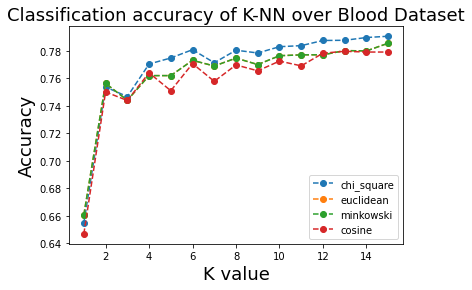

In [289]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
blood_df_final.plot(x="param_n_neighbors", y=["chi_square", "euclidean","minkowski","cosine"],linestyle='--',marker='o')
plt.xlabel('K value',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Classification accuracy of K-NN over Blood Dataset',fontsize=18)

Text(0.5, 1.0, 'Classification accuracy of K-NN over Cancer Dataset')

<Figure size 864x720 with 0 Axes>

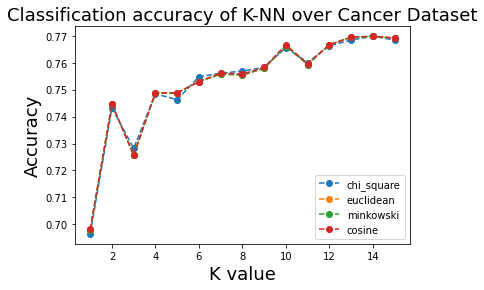

In [290]:
plt.figure(figsize=(12,10))
cancer_df_final.plot(x="param_n_neighbors", y=["chi_square", "euclidean","minkowski","cosine"],linestyle='--',marker='o')
plt.xlabel('K value',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Classification accuracy of K-NN over Cancer Dataset',fontsize=18)

Text(0.5, 1.0, 'Classification accuracy of K-NN over Ecoli Dataset')

<Figure size 864x720 with 0 Axes>

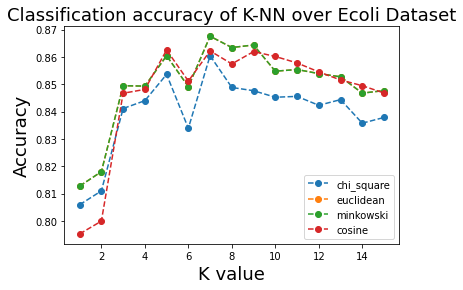

In [291]:
plt.figure(figsize=(12,10))
ecoli_df_final.plot(x="param_n_neighbors", y=["chi_square", "euclidean","minkowski","cosine"],linestyle='--',marker='o')
plt.xlabel('K value',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Classification accuracy of K-NN over Ecoli Dataset',fontsize=18)

In [ ]:
# Report the best cross-validation score on three datasets. 

In [265]:
blood_best_model = blood_grid_search.best_estimator_ 

In [266]:
blood_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function chi_square_distance at 0x7fb45f77bc80>,
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [267]:
from sklearn.model_selection import cross_val_score
print('Cross-validation Accuracy on blood data set: ',cross_val_score(blood_best_model,X_train_scale_blood,y_train_blood,cv=10).mean())

Cross-validation Accuracy on blood data set:  0.7287207207207207


In [268]:
cancer_best_model = cancer_grid_search.best_estimator_ 

In [269]:
cancer_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function chi_square_distance at 0x7fb45f77bc80>,
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [270]:
print('Cross-validation Accuracy on cancer data set: ',cross_val_score(cancer_best_model,cancer_features_encode,cancer_label,cv=10).mean())

Cross-validation Accuracy on cancer data set:  0.7587438423645321


In [271]:
ecoli_best_model = ecoli_grid_search.best_estimator_ 

In [272]:
ecoli_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function euclidean at 0x7fb46626a1e0>,
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [273]:
print('Cross-validation Accuracy on ecoli data set: ',cross_val_score(ecoli_best_model,ecoli_df_updated_features,ecoli_df_updated_label,cv=10).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross-validation Accuracy on ecoli data set:  0.8598930481283421


In [274]:
from sklearn.metrics import accuracy_score

print('Accuracy on blood dataset : ',accuracy_score(blood_best_model.predict(X_train_scale_blood), y_train_blood))

Accuracy on blood dataset :  0.8088235294117647


In [130]:
print('Accuracy on cancer dataset: ',accuracy_score(cancer_best_model.predict(cancer_features_encode), cancer_label))

Accuracy on cancer dataset:  0.7832167832167832


In [131]:
print('Accuracy on ecoli dataset: ',accuracy_score(ecoli_best_model.predict(ecoli_df_updated_features), ecoli_df_updated_label))

Accuracy on ecoli dataset:  0.8958333333333334


In [ ]:
# Question for graduate student

Text(0.5, 0, 'k value')

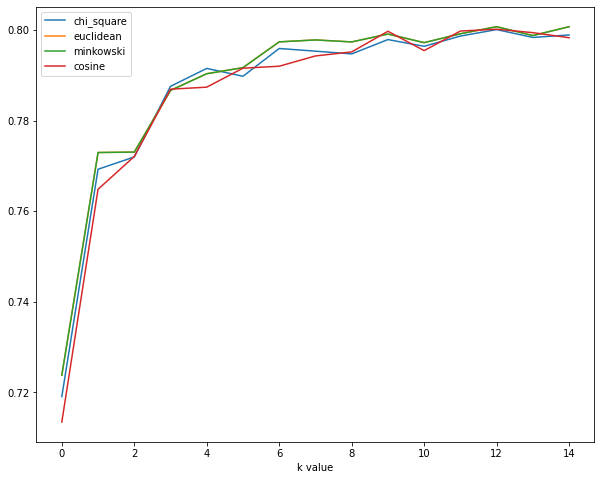

In [292]:
chi_square_average = []
euclidean_average = []
minkowski_average = []
cosine_average = []

for k in range(0,15):
  total_avg_chi_square = (blood_df_final['chi_square'][k]+cancer_df_final['chi_square'][k]+ecoli_df_final['chi_square'][k])/3
  total_avg_euclidean = (blood_df_final['euclidean'][k]+cancer_df_final['euclidean'][k]+ecoli_df_final['euclidean'][k])/3
  total_avg_minkowski = (blood_df_final['minkowski'][k]+cancer_df_final['minkowski'][k]+ecoli_df_final['minkowski'][k])/3
  total_avg_cosine = (blood_df_final['cosine'][k]+cancer_df_final['cosine'][k]+ecoli_df_final['cosine'][k])/3

  chi_square_average.append(total_avg_chi_square)
  euclidean_average.append(total_avg_euclidean)
  minkowski_average.append(total_avg_minkowski)
  cosine_average.append(total_avg_cosine)
plt.figure(figsize=(10,8))
plt.plot(range(0,15),chi_square_average,label='chi_square')
plt.plot(range(0,15),euclidean_average,label='euclidean')
plt.plot(range(0,15),minkowski_average,label='minkowski')
plt.plot(range(0,15),cosine_average,label='cosine')
plt.legend()
plt.xlabel('k value',fontsize=10)


